<a href="https://colab.research.google.com/github/JacksonLeb/tensorflow_learning/blob/main/05_transfer_learning_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fine Tuning

In [1]:
!nvidia-smi

Sat Jul 16 21:02:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##importing from github

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-07-16 21:02:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-07-16 21:02:08 (84.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



##importing from github file in google colab file structure

In [3]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

##Getting data

In [4]:
#Getting 10% training data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-07-16 21:02:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.126.128, 74.125.132.128, 74.125.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   182MB/s    in 0.9s    

2022-07-16 21:02:15 (182 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
unzip_data("10_food_classes_10_percent.zip")

In [6]:
#Checking num images and subdirectories
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [7]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [8]:
import tensorflow as tf
IMG_SIZE = (244,244)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)
train_data_10_percent,
test_data

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 244, 244, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [9]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [10]:
train_data_10_percent.take

<bound method DatasetV2.take of <BatchDataset element_spec=(TensorSpec(shape=(None, 244, 244, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>>

In [11]:
#example of a batch of data
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[ 18.444437    19.444437    11.444437  ]
   [ 19.934425    20.934425    12.934426  ]
   [ 21.745901    22.745901    14.745901  ]
   ...
   [ 55.01046     45.7564      36.7564    ]
   [ 57.521942    46.213375    36.565792  ]
   [ 64.29944     49.33501     38.656487  ]]

  [[ 19.937181    20.937181    12.9371805 ]
   [ 20.09023     21.09023     13.090231  ]
   [ 21.103937    22.103937    14.103937  ]
   ...
   [ 68.79275     59.757343    50.757343  ]
   [ 58.671516    48.524193    38.5733    ]
   [ 63.15043     50.871742    39.011086  ]]

  [[ 18.565575    19.565575    11.565574  ]
   [ 18.565575    19.565575    11.565574  ]
   [ 17.67596     18.67596     10.675961  ]
   ...
   [ 61.432354    53.735634    43.432354  ]
   [ 67.815506    60.684357    49.24993   ]
   [ 58.249012    51.117867    39.683437  ]]

  ...

  [[100.9836     101.9836      95.9836    ]
   [103.7295     104.7295      98.7295    ]
   [107.036606   108.036606   102.036606  ]
   ...
   [108.96297    113.962

#Keras functional API

In [12]:
#Building transfer leanring model
#Funcitonal api gives more flexibility with our models
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

#creating inputs for model
inputs = tf.keras.layers.Input(shape=(244,244,3), name="input_layer")

#If using ResNet50V2 you will need to normalize layers
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = base_model(inputs)
print(f"Base model shape: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_avg_pooling_layer")(x)
print(f"Shape after global avg pooling:{x.shape}")

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)


model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_10_percent = model_0.fit(train_data_10_percent,
                                epochs=5,
                                steps_per_epoch=len(train_data_10_percent),
                                validation_data=test_data,
                                validation_steps=int(.25 * len(test_data)),
                                callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                      experiment_name="10percentfeatureextraction")]
                                )

16719872/16705208 [==============================] - 0s 0us/step
Base model shape: (None, 7, 7, 1280)
Shape after global avg pooling:(None, 1280)
Saving TensorBoard log files to: transfer_learning/10percentfeatureextraction/20220716-210229
Epoch 1/5
24/24 [==============================] - 23s 282ms/step - loss: 1.8784 - accuracy: 0.4147 - val_loss: 1.3198 - val_accuracy: 0.7204
Epoch 2/5
24/24 [==============================] - 5s 195ms/step - loss: 1.1193 - accuracy: 0.7467 - val_loss: 0.9023 - val_accuracy: 0.8109
Epoch 3/5
24/24 [==============================] - 5s 172ms/step - loss: 0.8331 - accuracy: 0.7907 - val_loss: 0.7419 - val_accuracy: 0.8355
Epoch 4/5
24/24 [==============================] - 5s 196ms/step - loss: 0.6779 - accuracy: 0.8467 - val_loss: 0.6476 - val_accuracy: 0.8339
Epoch 5/5
24/24 [==============================] - 4s 170ms/step - loss: 0.5802 - accuracy: 0.8667 - val_loss: 0.5880 - val_accuracy: 0.8503


In [13]:
#evaluation
model_0.evaluate(test_data)

79/79 [==============================] - 7s 86ms/step - loss: 0.5956 - accuracy: 0.8524


[0.595612645149231, 0.852400004863739]

In [14]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [15]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

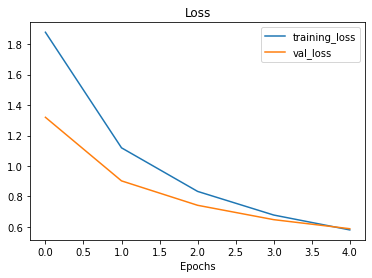

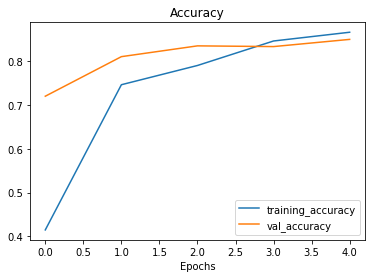

In [16]:
plot_loss_curves(history_10_percent)

#Getting feature vector from trainned model using Global average pooling layer

In [17]:
input_shape = (1,4,4,3)
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random Tensor: {input_tensor}")

Random Tensor: [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]


In [18]:
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2d global average pooled tensor: {global_average_pooled_tensor}")

2d global average pooled tensor: [[-0.09368646 -0.45840448 -0.2885598 ]]


In [19]:
print(f"input tensor: {input_tensor.shape}")
print(f"global average tensor: {global_average_pooled_tensor.shape}")

input tensor: (1, 4, 4, 3)
global average tensor: (1, 3)


In [20]:
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

##Transfer learning experiments

In [21]:
#Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

--2022-07-16 21:03:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.198.128, 173.194.192.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.198.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   101MB/s    in 1.3s    

2022-07-16 21:03:24 (101 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [22]:
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

In [23]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'

In [24]:
#preprocessing the data
IMG_SIZE = (244,244)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                           label_mode="categorical",
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


#Augmenting the data while in the model

In [25]:
print(tf.__version__)

2.8.2


In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.Rescaling(1./255),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2)
], name="data_augmentation")

###visualizing our data augmentation data

In [27]:
#viewing random image and comparing to augmented counterpart

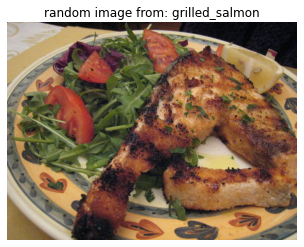

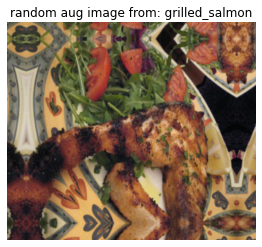

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image
img = mpimg.imread(random_image_path)
plt.title(f"random image from: {target_class}")
plt.axis(False)
plt.imshow(img)

#augmented image
augmented_img = data_augmentation(img, training=True)
plt.figure()
plt.title(f"random aug image from: {target_class}")
plt.axis(False)
plt.imshow(augmented_img)



In [29]:
#feature extraction on 1% data
input_shape = (244,244,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

#create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

#data aug as layer
x = data_augmentation(inputs)

#give base model inputs after aug
x = base_model(x, training=False)

#pooling feature tensor
x = layers.GlobalAveragePooling2D(name="global_pooling_layer")(x)

outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_1 = keras.Model(inputs, outputs)

In [30]:
model_1.compile(loss="categorical_crossentropy",
                optimizer=keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1_percent = model_1.fit(train_data_1_percent,
            epochs=5,
            steps_per_epoch=len(train_data_1_percent),
            validation_data=test_data,
            validation_steps=(0.25*len(test_data)),
            callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                   experiment_name="FeatureExtraction1Percent")])

Saving TensorBoard log files to: transfer_learning/FeatureExtraction1Percent/20220716-210329
Epoch 1/5
3/3 [==============================] - 12s 3s/step - loss: 2.3227 - accuracy: 0.0429 - val_loss: 2.3150 - val_accuracy: 0.0969
Epoch 2/5
3/3 [==============================] - 3s 1s/step - loss: 2.3143 - accuracy: 0.1143 - val_loss: 2.3202 - val_accuracy: 0.0750
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 2.3059 - accuracy: 0.1143 - val_loss: 2.3281 - val_accuracy: 0.0828
Epoch 4/5
3/3 [==============================] - 5s 2s/step - loss: 2.3326 - accuracy: 0.0857 - val_loss: 2.3445 - val_accuracy: 0.0859
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 2.3375 - accuracy: 0.1000 - val_loss: 2.3308 - val_accuracy: 0.0953


In [31]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 244, 244, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, 3)          0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_pooling_layer (Globa  (None, 1280)             0         
 lAveragePooling2D)                                              
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [32]:
model_1.evaluate(test_data)

79/79 [==============================] - 7s 82ms/step - loss: 2.3337 - accuracy: 0.1000


[2.333699941635132, 0.10000000149011612]

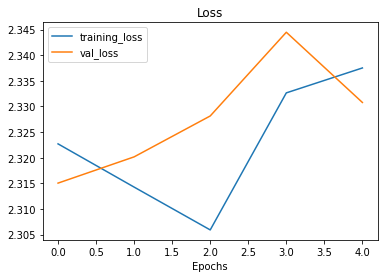

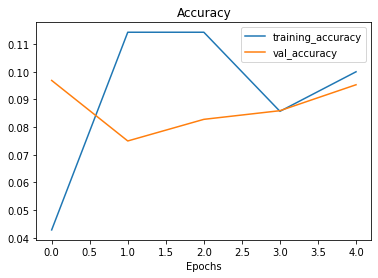

In [33]:
plot_loss_curves(history_1_percent)

In [34]:
import tensorflow as tf
IMG_SIZE = (244,244)

data_augmentation = tf.keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomRotation(0.2)
], name="data_augmentation")


#set up input shape
input_shape = (244,244,3)

#create frozen base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

#Create the input and outputs including the layers in between
inputs = layers.Input(input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [35]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 244, 244, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 244, 244, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

#Using ModleCheckpoint callback to immediately save weights and biases during epoch


In [38]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoints.ckpt"

#create a model checkpoint callabck that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, save_best_only=True, save_freq="epoch", verbose=1)


In [37]:
#fitting hte model
initial_epochs = 5
hisotry_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)),
                                          callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                 experiment_name="10_percent_data_aug"),
                                                     checkpoint_callback]
                                          )

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20220716-211709
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0138 - accuracy: 0.3293
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 25s 686ms/step - loss: 2.0138 - accuracy: 0.3293 - val_loss: 1.4760 - val_accuracy: 0.6530
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3380 - accuracy: 0.7093
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 13s 511ms/step - loss: 1.3380 - accuracy: 0.7093 - val_loss: 1.0413 - val_accuracy: 0.7500
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0535 - accuracy: 0.7480
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 12s 486ms/step - loss: 1.0535 - accuracy: 0.7480 - val_loss: 0.8129 - val_accuracy: 0.807

In [39]:
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 10s 112ms/step - loss: 0.6745 - accuracy: 0.8168


[0.6744765639305115, 0.8167999982833862]

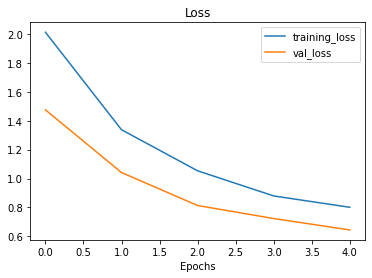

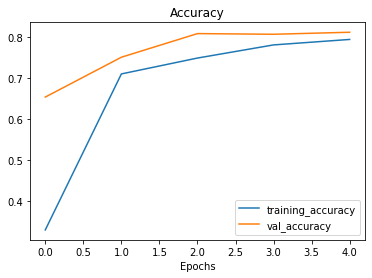

In [41]:
plot_loss_curves(hisotry_10_percent_data_aug)

#loading in checkpointed weights


In [42]:
model_2.load_weights(checkpoint_path)


In [43]:
#evaluating model 2 with laoded weights
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 9s 104ms/step - loss: 0.6745 - accuracy: 0.8168


In [44]:
results_10_percent_data_aug == loaded_weights_model_results

False

In [45]:
results_10_percent_data_aug

[0.6744765639305115, 0.8167999982833862]

In [46]:
loaded_weights_model_results

[0.6744764447212219, 0.8167999982833862]

In [49]:
#Check to see if loaded model results are very close to our preivous non-loaded model
import numpy as np
np.isclose(np.array(loaded_weights_model_results), np.array(results_10_percent_data_aug))

array([ True,  True])

In [50]:
#checking difference bewten resutls
print(np.array(results_10_percent_data_aug) - np.array(loaded_weights_model_results))

[1.1920929e-07 0.0000000e+00]


#model 3: fine tuning 10 percent data

##Fine Tuning should come after feature extraction model testing

In [52]:
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f7c7d38a910> True
<keras.engine.sequential.Sequential object at 0x7f7c7d3196d0> True
<keras.engine.functional.Functional object at 0x7f7c7cdfca50> False
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7f7c7ced03d0> True
<keras.layers.core.dense.Dense object at 0x7f7c7ce41090> True


In [54]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_3 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [55]:
#HOW MANY trainable variables in our base model
print(len(model_2.layers[2].trainable_variables))

0


In [58]:
#to begin fine tuning, setting last 10 layers of basemodel.trainable = True
base_model.trainable = True

#freeze all layers besdies last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

#Recompile model after changes

#unfreezing layers should change lr by 10x
model_2.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [59]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_3 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [60]:
#Now we have frozen some layers at the tope, how many trainable variables are there
print(len(model_2.trainable_variables))

12


In [63]:
#fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

#refit model
hisotry_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=fine_tune_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)),
                                          initial_epoch=hisotry_10_percent_data_aug.epoch[-1],
                                          callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                 experiment_name="fine_10_percent_data_aug"),
                                                     checkpoint_callback]
                                          )

Saving TensorBoard log files to: transfer_learning/fine_10_percent_data_aug/20220716-214136
Epoch 5/10
24/24 [==============================] - ETA: 0s - loss: 0.6729 - accuracy: 0.8093
Epoch 5: val_loss improved from inf to 0.53445, saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 21s 566ms/step - loss: 0.6729 - accuracy: 0.8093 - val_loss: 0.5345 - val_accuracy: 0.8043
Epoch 6/10
24/24 [==============================] - ETA: 0s - loss: 0.5532 - accuracy: 0.8267
Epoch 6: val_loss improved from 0.53445 to 0.49659, saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt
24/24 [==============================] - 12s 484ms/step - loss: 0.5532 - accuracy: 0.8267 - val_loss: 0.4966 - val_accuracy: 0.8207
Epoch 7/10
24/24 [==============================] - ETA: 0s - loss: 0.4969 - accuracy: 0.8627
Epoch 7: val_loss improved from 0.49659 to 0.47610, saving model to ten_percent_model_checkpoints_weights/checkpoints.ck

In [64]:
#evaluating model_2 after fine tuning
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 9s 110ms/step - loss: 0.4814 - accuracy: 0.8400


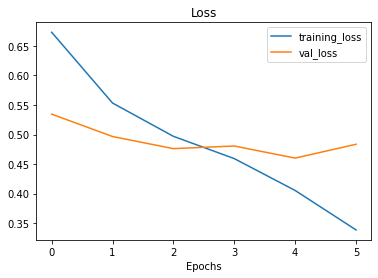

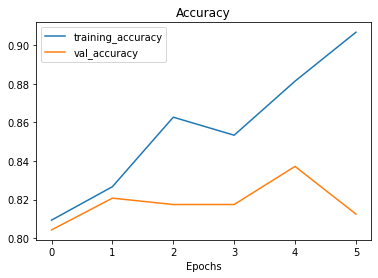

In [66]:
#check out loss curves
plot_loss_curves(hisotry_fine_10_percent_data_aug)

#updated plot_loss_curves to reflect if a model has been fit more than once

In [76]:
def compare_histories(original_history, new_history, initial_epochs=5):
  """
  compares two history objects
  """

  #getting data
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  #combnine hisotry
  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  #make plot
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)


  plt.plot(total_acc, label="training acc")
  plt.plot(total_val_acc, label="val acc")

  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start fine tuning")

  plt.legend(loc="lower right")

    #make plot loss
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,2)


  plt.plot(total_loss, label="training loss")
  plt.plot(total_val_loss, label="val loss")

  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start fine tuning")

  plt.legend(loc="upper right")



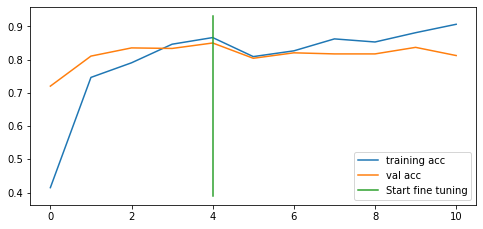

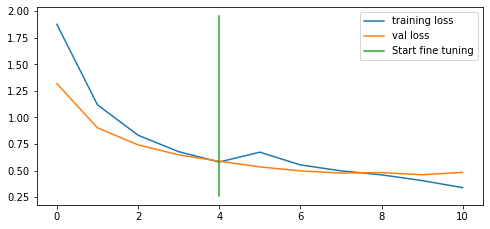

In [77]:
compare_histories(history_10_percent,
                 hisotry_fine_10_percent_data_aug)

#model 4 fine-tuning existing model on all data

In [78]:
#downloading and unzipping all data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2022-07-16 21:54:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   157MB/s    in 3.2s    

2022-07-16 21:54:30 (157 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [79]:
#setting up dirs
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [80]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 

In [83]:
#data inputs
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE)
test_data_classes_full = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


#reverting back to before fine tuning


In [84]:
model_2.load_weights(checkpoint_path)

In [85]:
model_2.evaluate(test_data)

79/79 [==============================] - 9s 98ms/step - loss: 0.4736 - accuracy: 0.8444


[0.47359371185302734, 0.8443999886512756]

In [86]:
results_fine_tune_10_percent

[0.4813936650753021, 0.8399999737739563]

In [87]:
model_2.evaluate(test_data)

79/79 [==============================] - 8s 96ms/step - loss: 0.4736 - accuracy: 0.8444


[0.47359374165534973, 0.8443999886512756]

In [89]:
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling True
4 output_layer True


In [90]:
#drilling into basemodel
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_3 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [91]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

In [100]:
fine_tune_epochs = initial_epochs + 5
history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs=fine_tune_epochs,
                                           validation_data=test_data,
                                           validation_steps=int(0.25*len(test_data)),
                                           initial_epoch=history_10_percent.epoch[-1],
                                           callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                 experiment_name="full_10_classes_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20220716-221532
Epoch 5/10
235/235 [==============================] - 78s 298ms/step - loss: 0.6501 - accuracy: 0.7921 - val_loss: 0.3006 - val_accuracy: 0.8947
Epoch 6/10
235/235 [==============================] - 63s 264ms/step - loss: 0.4669 - accuracy: 0.8520 - val_loss: 0.2816 - val_accuracy: 0.9030
Epoch 7/10
235/235 [==============================] - 54s 229ms/step - loss: 0.3745 - accuracy: 0.8781 - val_loss: 0.2873 - val_accuracy: 0.9030
Epoch 8/10
235/235 [==============================] - 54s 229ms/step - loss: 0.3249 - accuracy: 0.8936 - val_loss: 0.2453 - val_accuracy: 0.9293
Epoch 9/10
235/235 [==============================] - 52s 219ms/step - loss: 0.2674 - accuracy: 0.9145 - val_loss: 0.2777 - val_accuracy: 0.9095
Epoch 10/10
235/235 [==============================] - 48s 201ms/step - loss: 0.2308 - accuracy: 0.9241 - val_loss: 0.2522 - val_accuracy: 0.9178


#view tensorboard logs of transfer learning experiements
#uplaod tensorboard dev records

In [103]:
!tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer Learning Experiments with 10 food101 Classes" \
  --description "Different experiments with transfer learning feature extraction and fine tuning" \
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=LHQV3ODbThSow0fmAYRDjDNThgsLKG&prompt=consent&access_type=o